# Projects in data science: Evaluation

## Create a simple dataset for ISIC

**Exercises**:
1. Clone the following repo: https://github.com/vcheplygina/fyp2022-imaging.git
2. [Create a pandas dataframe](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html) from data/example_ground_truth.csv and features/features.csv
3. Only keep columns melanoma, area and perimeter in your dataframe

In [1]:
#1
if True:      
  !rm -rf fyp2022-imaging
  !git clone https://github.com/vcheplygina/fyp2022-imaging.git

Cloning into 'fyp2022-imaging'...
remote: Enumerating objects: 325, done.
remote: Total 325 (delta 0), reused 0 (delta 0), pack-reused 325
Receiving objects: 100% (325/325), 825.97 MiB | 4.54 MiB/s, done.
Resolving deltas: 100% (94/94), done.
Updating files: 100% (309/309), done.


In [2]:
# Your anwser
import pandas as pd
#2 and 3
df_gt = pd.read_csv("./fyp2022-imaging/data/example_ground_truth.csv")
df_features = pd.read_csv("./fyp2022-imaging/features/features.csv")
df = pd.merge(df_gt,df_features,left_on=["image_id"],right_on=["id"])[["melanoma","area","perimeter"]]
df.head(5)

,melanoma,area,perimeter
0,0.0,216160.0,2013.0
1,0.0,130493.0,1372.0
2,0.0,205116.0,1720.0
3,0.0,161705.0,1344.0
4,0.0,317040.0,2063.0


## Train/Test classifiers

**Exercises**:
1. Use [sklearn’s train_test_split function](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) to split your data frame into a training, validation and test set. You will need to use the function twice. You should now have 3 different variables for the features (x_train,x_val,x_test) and 3 different variables for the labels (y_train,y_val,y_test).
2. Import [KNeighborsClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html). Fit two different versions with different values of K.
3. Get the prediction of both classifiers on the validation set.
4. Import [sklearn’s metrics for accuracy and the AUC score](https://scikit-learn.org/stable/modules/classes.html#sklearn-metrics-metrics), and use them to compare the true and the predicted labels of the validation set. [You need to use probabilty for the AUC](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier.predict_proba). Print the accuracy and AUC score.
5. Run the code above again. Do the accuracy/AUC scores change? Investigate the parameters of train_test_split to see how you can add reproducibility to your code.


In [3]:
# Your answer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,roc_auc_score

#1
x_train,x_val,y_train,y_val = train_test_split(df[["area","perimeter"]],df["melanoma"],test_size=0.2,stratify=df["melanoma"])
x_val,x_test,y_val,y_test = train_test_split(x_val,y_val,test_size=0.5,stratify=y_val)

#2
knn_1 = KNeighborsClassifier(n_neighbors=1)
knn_1.fit(x_train,y_train)

knn_5 = KNeighborsClassifier(n_neighbors=5)
knn_5.fit(x_train,y_train)

#3
predict_knn1 = knn_1.predict(x_val)
predict_knn5 = knn_5.predict(x_val)

#4
acc_knn1 = accuracy_score(y_val,predict_knn1)
acc_knn5 = accuracy_score(y_val,predict_knn5)

auc_knn1 = roc_auc_score(y_val,knn_1.predict_proba(x_val)[:,1])
auc_knn5 = roc_auc_score(y_val,knn_5.predict_proba(x_val)[:,1])
print("Without set random_state")
print(f"Accuracy\tKNN_1:{acc_knn1}\tKNN_5:{acc_knn5}")
print(f"AUC\tKNN_1:{auc_knn1}\tKNN_5:{auc_knn5}")


#5
x_train,x_val,y_train,y_val = train_test_split(df[["area","perimeter"]],df["melanoma"],test_size=0.2,stratify=df["melanoma"],random_state=1907)
x_val,x_test,y_val,y_test = train_test_split(x_val,y_val,test_size=0.5,stratify=y_val,random_state=1907)
knn_1 = KNeighborsClassifier(n_neighbors=1)
knn_1.fit(x_train,y_train)
knn_5 = KNeighborsClassifier(n_neighbors=5)
knn_5.fit(x_train,y_train)
predict_knn1 = knn_1.predict(x_val)
predict_knn5 = knn_5.predict(x_val)

acc_knn1 = accuracy_score(y_val,predict_knn1)
acc_knn5 = accuracy_score(y_val,predict_knn5)

auc_knn1 = roc_auc_score(y_val,knn_1.predict_proba(x_val)[:,1])
auc_knn5 = roc_auc_score(y_val,knn_5.predict_proba(x_val)[:,1])
print("\nWith set random_state")
print(f"Accuracy\tKNN_1:{acc_knn1}\tKNN_5:{acc_knn5}")
print(f"AUC\tKNN_1:{auc_knn1}\tKNN_5:{auc_knn5}")

Without set random_state
Accuracy	KNN_1:0.6666666666666666	KNN_5:0.7333333333333333
AUC	KNN_1:0.5416666666666666	KNN_5:0.5416666666666666

With set random_state
Accuracy	KNN_1:0.6	KNN_5:0.7333333333333333
AUC	KNN_1:0.375	KNN_5:0.4722222222222222


**Your comments**:

## Overfitting

**Exercises**:
1. Load an articial dataset with 2 features from sklearn, as for example [make_moons](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html#sklearn.datasets.make_moons)
2. Train and test some classifiers, [visualize the classifier boundaries in 2D](https://scikit-learn.org/stable/modules/generated/sklearn.inspection.DecisionBoundaryDisplay.html#sklearn.inspection.DecisionBoundaryDisplay.from_estimator), and record the performance on your train and validation sets.
3. Add some non-informative features to the data by generating random numbers. Train/evaluate the classifiers again (since you now have more dimensions, you cannot visualize them). You can also do feature selection or other steps here as part of your classifier. Are you able to achieve good performance on the training set, but bad performance on the validation set?
4. Create a learning curve by varying the number of samples in your dataset, and plotting the training/validation evaluation metrics, as a function of the training sample size. To get a better idea of the performance, train/evaluate the classifiers multiple times, and plot the mean + standard deviation of the metric (rather than just the average accuracy/AUC)

<Figure size 640x480 with 0 Axes>

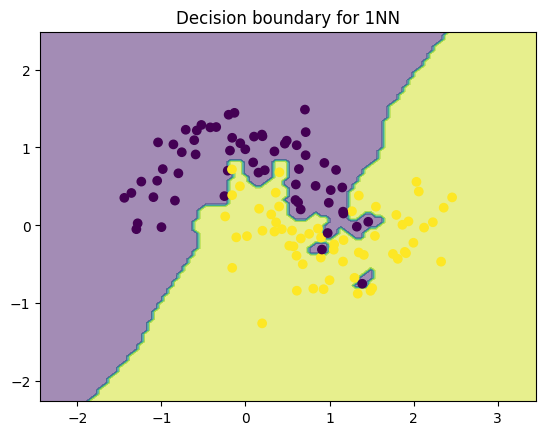

Train	Accuracy:1.0	AUC:1.0
Validation	Accuracy:0.8666666666666667	AUC:0.875


<Figure size 640x480 with 0 Axes>

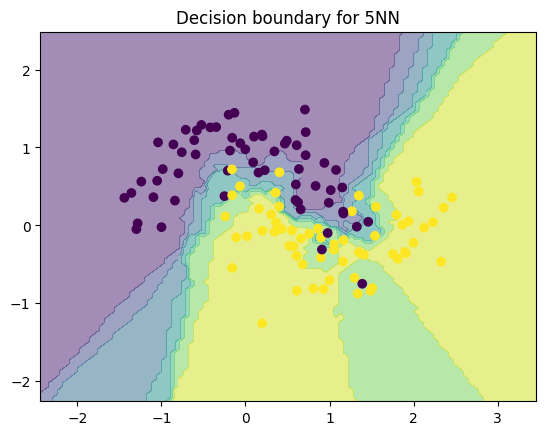

Train	Accuracy:0.925	AUC:0.9774999999999999
Validation	Accuracy:0.9333333333333333	AUC:1.0


###################################QUESTION 3###################################


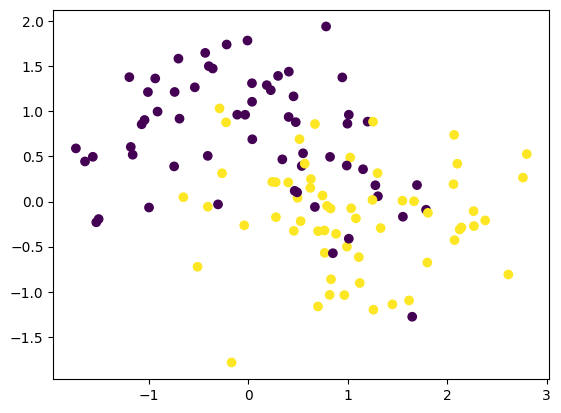


Model: 1NN
Train	Accuracy:1.0	AUC:1.0
Validation	Accuracy:0.6666666666666666	AUC:0.6696428571428572

Model: 5NN
Train	Accuracy:0.8083333333333333	AUC:0.8816666666666667
Validation	Accuracy:0.8666666666666667	AUC:0.9017857142857143


In [4]:
#Your answer
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.tree import DecisionTreeClassifier
import numpy as np
np.random.seed(1907)

#1
X,y=make_moons(n_samples=150,noise=0.3, random_state=1907)
x_train,x_val,y_train,y_val = train_test_split(X,y,test_size=0.2,stratify=y,random_state=1907)
x_val,x_test,y_val,y_test = train_test_split(x_val,y_val,test_size=0.5,stratify=y_val,random_state=1907)

#2
models = [("1NN",KNeighborsClassifier(n_neighbors=1)),("5NN",KNeighborsClassifier(n_neighbors=5))]
for name,model in models:
    model.fit(x_train,y_train)

    predict_train = model.predict(x_train)
    acc_train = accuracy_score(y_train,predict_train)
    auc_train = roc_auc_score(y_train,model.predict_proba(x_train)[:,1])

    predict_val = model.predict(x_val)
    acc_val = accuracy_score(y_val,predict_val)
    auc_val = roc_auc_score(y_val,model.predict_proba(x_val)[:,1])

    plt.figure()
    DecisionBoundaryDisplay.from_estimator(model,x_train,alpha=0.5)
    plt.scatter(x_train[:,0],x_train[:,1],c=y_train)
    plt.title(f"Decision boundary for {name}")
    plt.show()
    print(f"Train\tAccuracy:{acc_train}\tAUC:{auc_train}")
    print(f"Validation\tAccuracy:{acc_val}\tAUC:{auc_val}")

#3
X,y=make_moons(n_samples=150,noise=0.5, random_state=1907)
new_features = np.random.rand(len(X),10)
X = np.hstack((X,new_features))
x_train,x_val,y_train,y_val = train_test_split(X,y,test_size=0.2,stratify=y,random_state=1907)
x_val,x_test,y_val,y_test = train_test_split(x_val,y_val,test_size=0.5,stratify=y_val,random_state=1907)
print("\n\n###################################QUESTION 3###################################")
plt.figure()
plt.scatter(x_train[:,0],x_train[:,1],c=y_train)
plt.show()
for name,model in models:
    model.fit(x_train,y_train)

    predict_train = model.predict(x_train)
    acc_train = accuracy_score(y_train,predict_train)
    auc_train = roc_auc_score(y_train,model.predict_proba(x_train)[:,1])

    predict_val = model.predict(x_val)
    acc_val = accuracy_score(y_val,predict_val)
    auc_val = roc_auc_score(y_val,model.predict_proba(x_val)[:,1])
    print(f"\nModel: {name}")
    print(f"Train\tAccuracy:{acc_train}\tAUC:{auc_train}")
    print(f"Validation\tAccuracy:{acc_val}\tAUC:{auc_val}")


In [5]:
dataset_sizes = [20,30,50,75,100,150,200,350,500,750,1000]
res_train_sizes = []
res_val_sizes = []

for s in dataset_sizes:

    X,y=make_moons(n_samples=s,noise=2, random_state=1907)
    #Run the experiments 5 times
    res_runs = []
    for run in range(5):
        x_train,x_val,y_train,y_val = train_test_split(X,y,test_size=0.2,stratify=y)
        x_val,x_test,y_val,y_test = train_test_split(x_val,y_val,test_size=0.5,stratify=y_val)
        knn_3 = KNeighborsClassifier(n_neighbors=3)
        knn_3.fit(x_train,y_train)
        predict_train = knn_3.predict(x_train)
        acc_train = accuracy_score(y_train,predict_train)
        auc_train = roc_auc_score(y_train,knn_3.predict_proba(x_train)[:,1])

        predict_val = knn_3.predict(x_val)
        acc_val = accuracy_score(y_val,predict_val)
        auc_val = roc_auc_score(y_val,knn_3.predict_proba(x_val)[:,1])
        res_runs.append([(acc_train,auc_train),(acc_val,auc_val)])
    acc_train_mean,acc_train_std = np.mean([r[0][0] for r in res_runs]),np.std([r[0][0] for r in res_runs])
    auc_train_mean,auc_train_std = np.mean([r[0][1] for r in res_runs]),np.std([r[0][1] for r in res_runs])

    acc_val_mean,acc_val_std = np.mean([r[1][0] for r in res_runs]),np.std([r[1][0] for r in res_runs])
    auc_val_mean,auc_val_std = np.mean([r[1][1] for r in res_runs]),np.std([r[1][1] for r in res_runs])

    res_train_sizes.append([(acc_train_mean,acc_train_std),(auc_train_mean,auc_train_std)])
    res_val_sizes.append([(acc_val_mean,acc_val_std),(auc_val_mean,auc_val_std)])

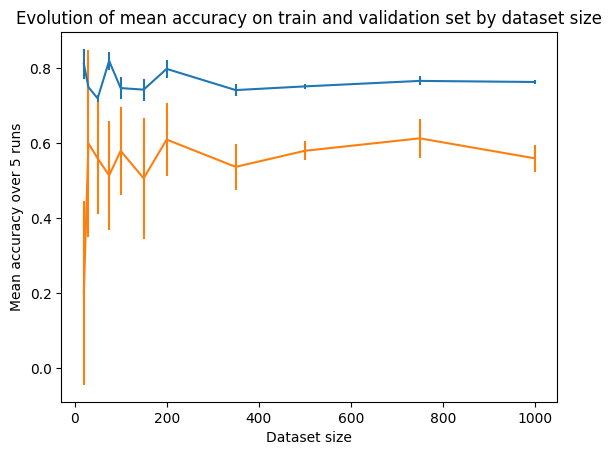

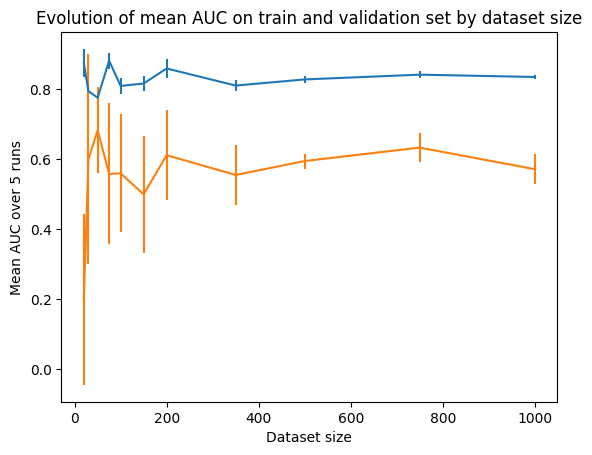

In [6]:
plt.figure()
plt.title("Evolution of mean accuracy on train and validation set by dataset size")
plt.ylabel("Mean accuracy over 5 runs")
plt.xlabel("Dataset size")
plt.errorbar(dataset_sizes,[r[0][0] for r in res_train_sizes],[r[0][1] for r in res_train_sizes])
plt.errorbar(dataset_sizes,[r[0][0] for r in res_val_sizes],[r[0][1] for r in res_val_sizes])
plt.show()

plt.figure()
plt.title("Evolution of mean AUC on train and validation set by dataset size")
plt.ylabel("Mean AUC over 5 runs")
plt.xlabel("Dataset size")
plt.errorbar(dataset_sizes,[r[1][0] for r in res_train_sizes],[r[1][1] for r in res_train_sizes])
plt.errorbar(dataset_sizes,[r[1][0] for r in res_val_sizes],[r[1][1] for r in res_val_sizes])
plt.show()

**Your comments**: